In [1]:
%matplotlib inline
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd

/Users/harjasleen1


In [3]:
cd Desktop

/Users/harjasleen1/Desktop


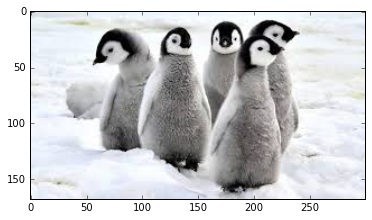

In [4]:
pic=imread('penguin.jpg')
plt.imshow(pic)

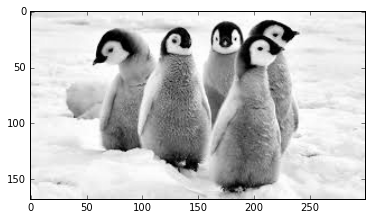

In [5]:
from PIL import Image
img=Image.open('penguin.jpg').convert('L')
plt.imshow(img, cmap='gray')

In [6]:
fourier_transform=np.fft.fft2(img)

In [7]:
fourier_transform=(np.fft.fftshift(np.abs(fourier_transform)))

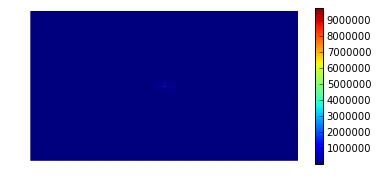

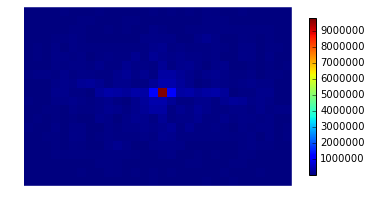

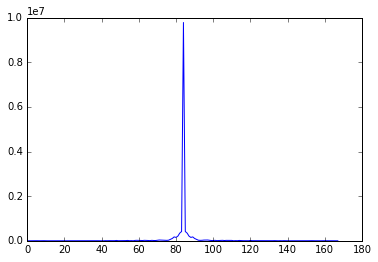

In [8]:
plt.imshow(fourier_transform, interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.imshow(fourier_transform[75:95, 135:165], interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.plot(fourier_transform[:,150])
plt.show()

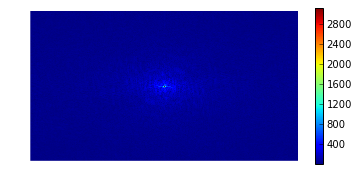

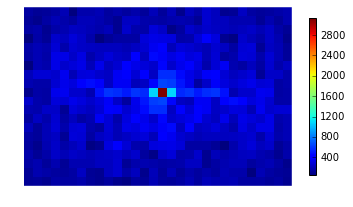

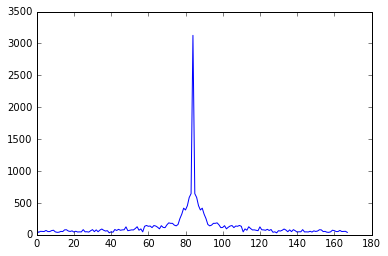

In [9]:
plt.imshow(np.sqrt(fourier_transform), interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.imshow(np.sqrt(fourier_transform[75:95, 135:165]), interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.plot(np.sqrt(fourier_transform[:,150]))
plt.show()

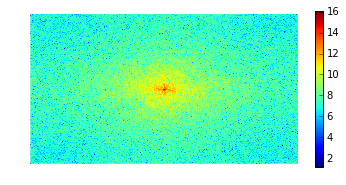

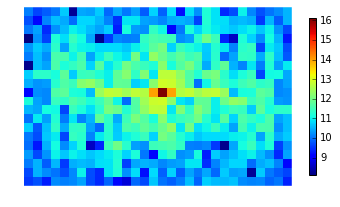

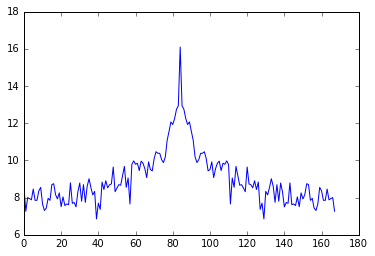

In [10]:
plt.imshow(np.log(fourier_transform), interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.imshow(np.log(fourier_transform[75:95, 135:165]), interpolation='none')
plt.axis('off')
plt.colorbar(shrink=0.7)
plt.show()
plt.plot(np.log(fourier_transform[:,150]))
plt.show()

In [11]:
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.filters import laplace

In [12]:
img = np.array(img, dtype=float)

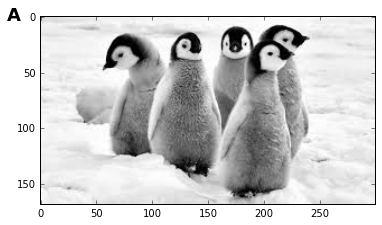

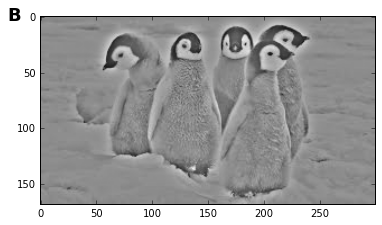

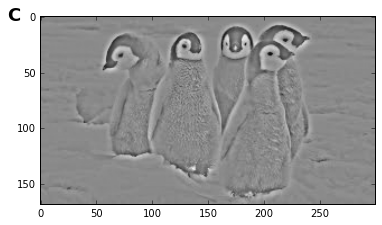

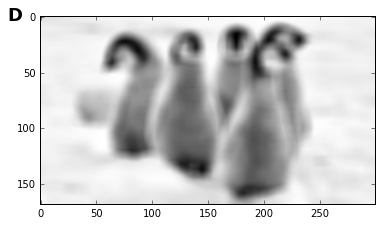

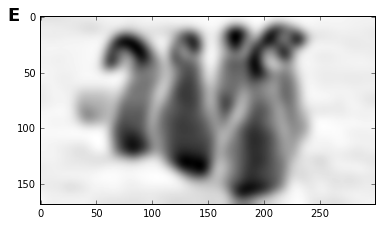

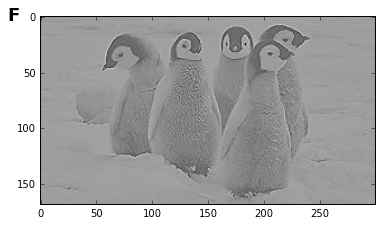

In [13]:
plt.imshow(img, cmap='gray')
plt.text(-30,3, "A", fontweight='bold', fontsize='18')
plt.show()
plt.imshow((img-gaussian_filter(img, 5)), cmap='gray')
plt.text(-30,3, "B", fontweight='bold', fontsize='18')
plt.show()
plt.imshow((img - uniform_filter(img, (10,10))), cmap='gray')
plt.text(-30,3, "C", fontweight='bold', fontsize='18')
plt.show()
plt.imshow((uniform_filter(img, (10,10))), cmap='gray')
plt.text(-30,3, "D", fontweight='bold', fontsize='18')
plt.show()
plt.imshow((gaussian_filter(img, 5)), cmap='gray')
plt.text(-30,3, "E", fontweight='bold', fontsize='18')
plt.show()
plt.imshow((img - laplace(img)), cmap='gray')
plt.text(-30,3, "F", fontweight='bold', fontsize='18')
plt.show()

In [14]:
import hyperspy.api as hs

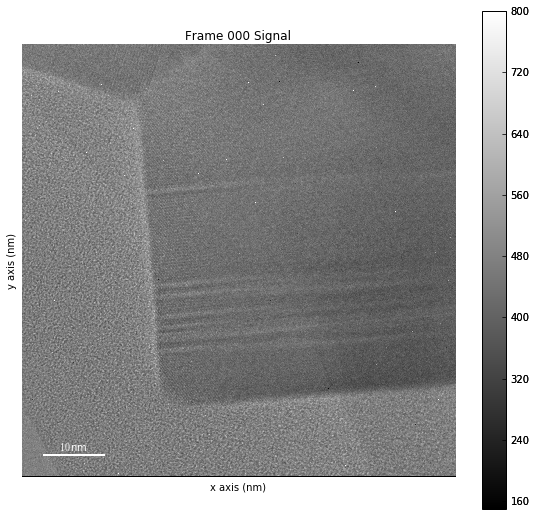

In [15]:
s=hs.load("Frame 000.dm3")
s.plot(vmin=150, vmax=800)

In [16]:
image = s.data

In [17]:
#plt.plot(np.sum(image[500:700,990:1000], axis=1)/10.)
#plt.show()

In [18]:
fourier_transform=np.fft.fftshift(np.abs(np.fft.fft2(image)))


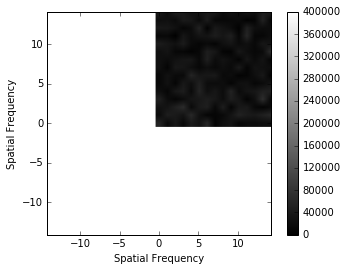

In [19]:
plt.imshow(fourier_transform, cmap='gray', vmin=0, vmax=400000)
plt.axis([-14.16760662,14.15377106,-14.16760662,14.15377106])
plt.colorbar()
plt.xlabel("Spatial Frequency")
plt.ylabel("Spatial Frequency")
plt.show()

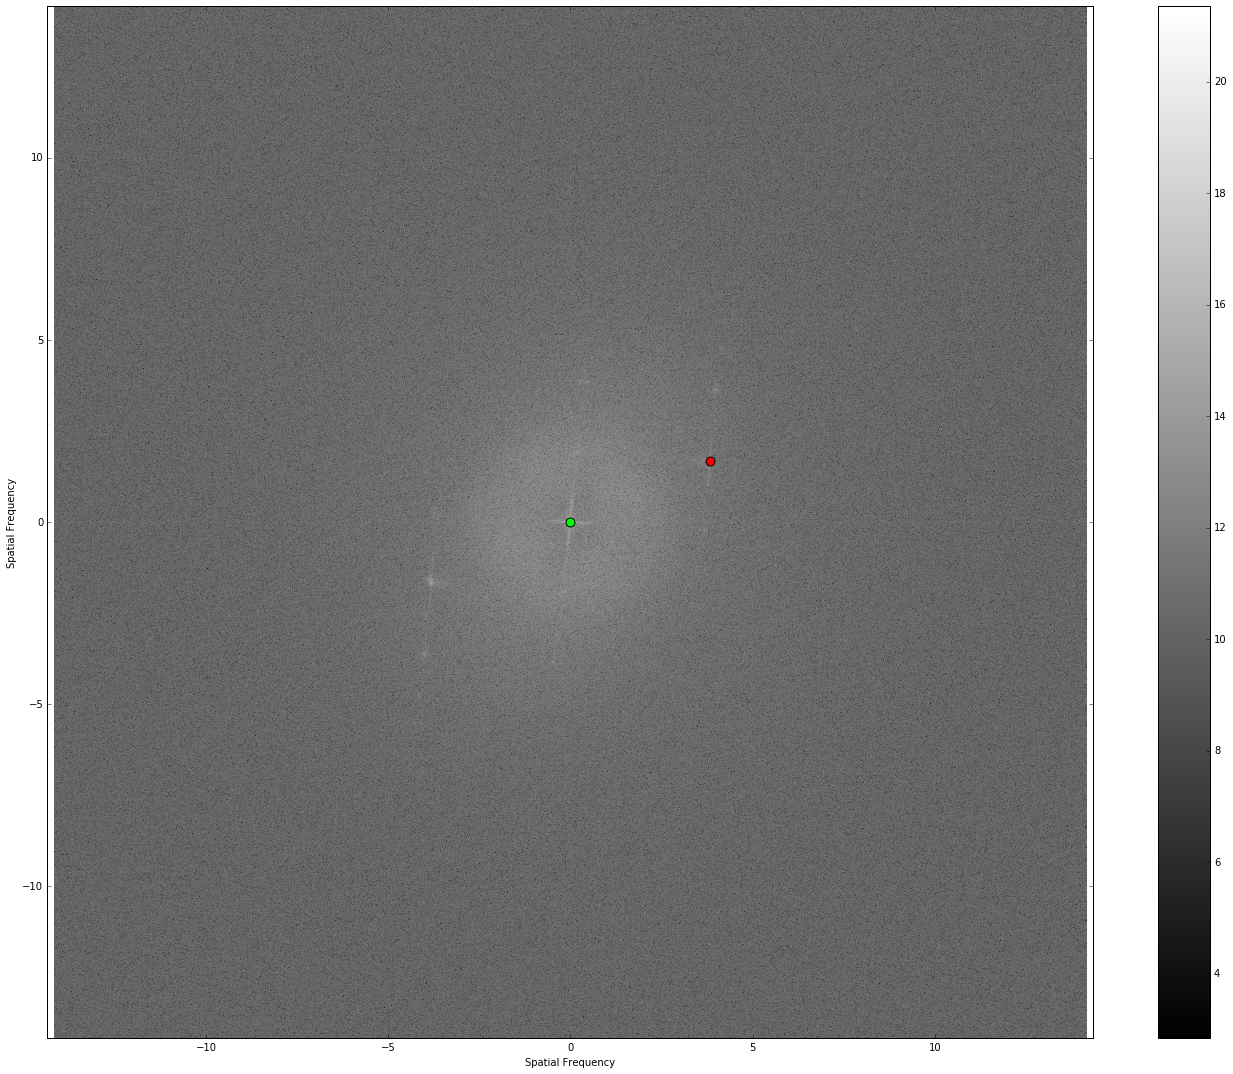

In [20]:
plt.figure(figsize=(19,15))
ky = np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[0])
kx = np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[1])
plt.pcolormesh(kx, ky, np.log(fourier_transform), cmap='gray')
plt.axis([-14.16760662,14.15377106,-14.16760662,14.15377106])
plt.colorbar()
y, x = np.where(fourier_transform==np.max(fourier_transform))
plt.scatter(np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[1])[x],
            np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[0])[y], c='lime', s=80)
y, x = np.where(fourier_transform==np.max(fourier_transform[1080:,1080:]))
plt.scatter(np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[1])[x],
            np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[0])[y], c='red', s=80)
plt.axis('equal')
plt.ylim([np.min(ky), np.max(ky)])
plt.xlim([np.min(kx), np.max(kx)])
plt.xlabel("Spatial Frequency")
plt.ylabel("Spatial Frequency")
plt.tight_layout()
plt.show()

In [21]:
np.linspace(-14.16760662,14.15377106,np.shape(fourier_transform)[1])[y]

array([ 1.6602664])

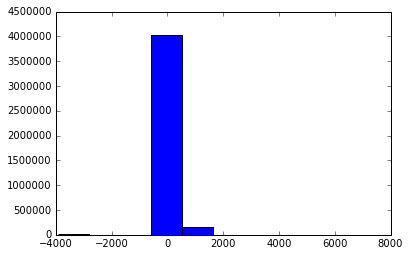

In [22]:
plt.hist(np.ravel(image))
plt.show()

In [23]:
s.axes_manager

Signal axis name,size,offset,scale,units
x,2048,-0.0,0.035291776061058044,nm
y,2048,-0.0,0.035291776061058044,nm


In [24]:
np.fft.fftshift(np.fft.fftfreq(2048, 0.035291776061058044))

array([-14.16760662, -14.15377106, -14.13993551, ...,  14.12609996,
        14.13993551,  14.15377106])

20.224859431168078


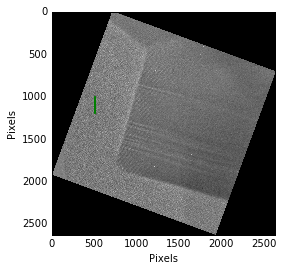

In [27]:
import math
import scipy 
import matplotlib.patches as patches
print(math.degrees(math.atan((1.4-0)/(3.8-0))))
rotated=scipy.ndimage.interpolation.rotate(s, -20.224859431168078)
fig,ax = plt.subplots(1)
ax.imshow(rotated, vmin=150, vmax=800)
rect = patches.Rectangle((500,990),10,200,linewidth=1,edgecolor='g',facecolor='none')
ax.add_patch(rect)
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.show()

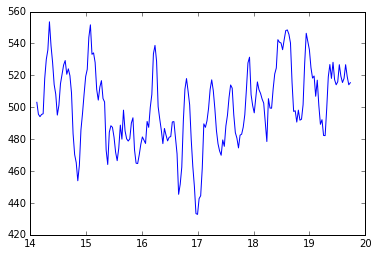

0.2608695652173913

In [37]:
x=(np.sum(rotated[500:700,990:1000], axis=1)/10.)
y=(np.arange(400,560,0.8)*0.035291776061058044)
plt.plot(y,x)
plt.show()
6/23